# Tugas Besar IF2220 Probabilitas dan Statistika
## Penarikan Kesimpulan dan Pengujian Hipotesis

Dibuat oleh: 
* Rayhan Alghifari Fauzta (13519039)
* Kinantan Arya Bagaspati (13519044)

## Persiapan

Pertama-tama, data dari file CSV dimuat menggunakan pandas. Load CSV disertai argumen ```names``` untuk memberikan nama ke masing-masing kolom sesuai spesifikasi.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Gandum.csv", names=["id", "Daerah", "SumbuUtama", "SumbuKecil", "Keunikan", "AreaBulatan", "Diameter", "KadarAir", "Keliling", "Bulatan", "Ransum", "Kelas"])
df

,id,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum,Kelas
0,1,5781,128.288875,58.470846,0.890095,5954,85.793926,0.674090,316.756,0.724041,2.194066,1
1,2,4176,109.348294,49.837688,0.890098,4277,72.918093,0.596231,260.346,0.774227,2.194088,1
2,3,4555,114.427991,52.151207,0.890105,4706,76.155145,0.776641,279.606,0.732159,2.194158,1
3,4,4141,108.701191,49.457349,0.890499,4236,72.611879,0.633180,260.478,0.766960,2.197877,1
4,5,5273,122.747869,55.757848,0.890876,5431,81.937733,0.669842,302.730,0.723031,2.201446,1
...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,5083,120.083450,54.821580,0.889709,5179,80.447975,0.534827,286.377,0.778850,2.190441,2
496,497,4432,112.367050,51.294914,0.889726,4550,75.119889,0.601194,270.823,0.759344,2.190608,2
497,498,5020,119.873742,54.718545,0.889740,5104,79.947874,0.528421,285.799,0.772311,2.190733,2
498,499,4035,107.311728,48.930802,0.889996,4150,71.676506,0.584698,258.503,0.758791,2.193132,2


Terdapat 500 baris dan 12 kolom pada dataset.

Selanjutnya, tipe data masing-masing kolom akan dicek untuk menentukan kolom mana saja yang numerik.

In [3]:
df.dtypes

id               int64
Daerah           int64
SumbuUtama     float64
SumbuKecil     float64
Keunikan       float64
AreaBulatan      int64
Diameter       float64
KadarAir       float64
Keliling       float64
Bulatan        float64
Ransum         float64
Kelas            int64
dtype: object

Diketahui tipe data seluruh kolom adalah numerik (int64 atau float64). Oleh karena itu, dapat dilakukan deskripsi statistika di seluruh kolom data.

Sebelum ke deskripsi, akan dicek terlebih dahulu keberadaan missing values (NaN) pada data.

In [4]:
df.isnull().sum()

id             0
Daerah         0
SumbuUtama     0
SumbuKecil     0
Keunikan       0
AreaBulatan    0
Diameter       0
KadarAir       0
Keliling       0
Bulatan        0
Ransum         0
Kelas          0
dtype: int64

Tidak terdapat missing values pada data. Oleh karena itu tidak perlu dilakukan penanganan khusus bagi data NaN.

# Nomor 1

Menulis deskripsi statistika dari semua kolom pada data yang bersifat numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis.

Gambaran umum data dapat dicari dengan method ```describe```

In [5]:
df.describe()

,id,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum,Kelas
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,4801.246000,116.045171,53.715246,0.878764,4937.048000,77.771158,0.648372,281.479722,0.761737,2.150915,1.502000
std,144.481833,986.395491,18.282626,4.071075,0.036586,1011.696255,8.056867,0.094367,37.335402,0.061702,0.249767,0.500497
min,1.000000,2522.000000,74.133114,39.906517,0.719916,2579.000000,56.666658,0.409927,197.015000,0.174590,1.440796,1.000000
25%,125.750000,4042.750000,104.116098,51.193576,0.863676,4170.250000,71.745308,0.572632,255.883000,0.731991,1.983939,1.000000
50%,250.500000,4735.000000,115.405140,53.731199,0.890045,4857.000000,77.645277,0.626117,280.045500,0.761288,2.193599,2.000000
75%,375.250000,5495.500000,129.046792,56.325158,0.907578,5654.250000,83.648598,0.726633,306.062500,0.796361,2.381612,2.000000
max,500.000000,7453.000000,227.928583,68.977700,0.914001,7720.000000,97.413830,0.878899,488.837000,0.904748,2.464809,2.000000


Dari hasil tersebut sudah dapat terlihat beberapa statistik data seperti mean, standar deviasi, nilai minimum, nilai maksimum, dan kuartil.

Berikutnya akan dilihat statistik masing-masing kolom.

In [6]:
from scipy.stats import iqr

def descriptive_statistics(df):
    print("Mean:", df.mean())
    print("Median:", df.median())
    print("Modus:", df.mode("index")[0])
    print("Standar Deviasi:", df.std())
    print("Variansi:", df.var())
    print("Range:", df.max()-df.min())
    print("Nilai Minimum:", df.min())
    print("Nilai Maksimum:", df.max())
    print("Kuartil pertama:", df.quantile(0.25))
    print("Kuartil kedua:", df.quantile(0.5))
    print("Kuartil ketiga:", df.quantile(0.75))
    print("Interquartile Range:", iqr(df))
    print("Skewness:", df.skew())
    print("Kurtosis:", df.kurtosis())

### id

Deskripsi Statistika untuk Kolom id

In [7]:
descriptive_statistics(df["id"])

Mean: 250.5
Median: 250.5
Modus: 1
Standar Deviasi: 144.4818327679989
Variansi: 20875.0
Range: 499
Nilai Minimum: 1
Nilai Maksimum: 500
Kuartil pertama: 125.75
Kuartil kedua: 250.5
Kuartil ketiga: 375.25
Interquartile Range: 249.5
Skewness: 0.0
Kurtosis: -1.2000000000000002


### Daerah

Deskripsi Statistika untuk Kolom Daerah

In [8]:
descriptive_statistics(df["Daerah"])

Mean: 4801.246
Median: 4735.0
Modus: 3992
Standar Deviasi: 986.3954914816018
Variansi: 972976.0656152307
Range: 4931
Nilai Minimum: 2522
Nilai Maksimum: 7453
Kuartil pertama: 4042.75
Kuartil kedua: 4735.0
Kuartil ketiga: 5495.5
Interquartile Range: 1452.75
Skewness: 0.23814408738280812
Kurtosis: -0.4346305340273977


### SumbuUtama

Deskripsi Statistika untuk Kolom SumbuUtama

In [9]:
descriptive_statistics(df["SumbuUtama"])

Mean: 116.04517136778003
Median: 115.40513994999999
Modus: 74.13311404
Standar Deviasi: 18.28262595755936
Variansi: 334.25441190402336
Range: 153.79546865999998
Nilai Minimum: 74.13311404
Nilai Maksimum: 227.9285827
Kuartil pertama: 104.11609817499999
Kuartil kedua: 115.40513994999999
Kuartil ketiga: 129.046792025
Interquartile Range: 24.93069385000001
Skewness: 0.7615287378076631
Kurtosis: 4.330533548436968


### SumbuKecil

Deskripsi Statistika untuk Kolom SumbuKecil

In [10]:
descriptive_statistics(df["SumbuKecil"])

Mean: 53.71524598896002
Median: 53.731198774999996
Modus: 39.90651744
Standar Deviasi: 4.071074752475035
Variansi: 16.573649640239662
Range: 29.071182429999993
Nilai Minimum: 39.90651744
Nilai Maksimum: 68.97769987
Kuartil pertama: 51.1935763325
Kuartil kedua: 53.731198774999996
Kuartil ketiga: 56.3251579825
Interquartile Range: 5.131581650000001
Skewness: -0.010828051555611359
Kurtosis: 0.47556845043813656


### Keunikan

Deskripsi Statistika untuk Kolom Keunikan

In [11]:
descriptive_statistics(df["Keunikan"])

Mean: 0.878763914340001
Median: 0.8900454185
Modus: 0.7199162259999999
Standar Deviasi: 0.03658590550477702
Variansi: 0.0013385284816044736
Range: 0.19408517999999997
Nilai Minimum: 0.7199162259999999
Nilai Maksimum: 0.9140014059999999
Kuartil pertama: 0.8636757527500001
Kuartil kedua: 0.8900454185
Kuartil ketiga: 0.907577917
Interquartile Range: 0.04390216424999993
Skewness: -1.6234718222806501
Kurtosis: 2.917255925694389


### AreaBulatan

Deskripsi Statistika untuk Kolom AreaBulatan

In [12]:
descriptive_statistics(df["AreaBulatan"])

Mean: 4937.048
Median: 4857.0
Modus: 3802
Standar Deviasi: 1011.6962549701573
Variansi: 1023529.3123206415
Range: 5141
Nilai Minimum: 2579
Nilai Maksimum: 7720
Kuartil pertama: 4170.25
Kuartil kedua: 4857.0
Kuartil ketiga: 5654.25
Interquartile Range: 1484.0
Skewness: 0.2575600053152032
Kurtosis: -0.40968492037366033


### Diameter

Deskripsi Statistika untuk Kolom Diameter

In [13]:
descriptive_statistics(df["Diameter"])

Mean: 77.77115780832005
Median: 77.64527658
Modus: 71.29356396
Standar Deviasi: 8.056867291849715
Variansi: 64.91311055847777
Range: 40.747172240000005
Nilai Minimum: 56.66665803
Nilai Maksimum: 97.41383027
Kuartil pertama: 71.74530754749999
Kuartil kedua: 77.64527658
Kuartil ketiga: 83.6485975675
Interquartile Range: 11.903290020000014
Skewness: 0.002724966865193717
Kurtosis: -0.4664545130312141


### KadarAir

Deskripsi Statistika untuk Kolom KadarAir

In [14]:
descriptive_statistics(df["KadarAir"])

Mean: 0.6483716718980002
Median: 0.626116699
Modus: 0.735849057
Standar Deviasi: 0.0943670980937953
Variansi: 0.008905149202643984
Range: 0.46897193099999995
Nilai Minimum: 0.409927152
Nilai Maksimum: 0.878899083
Kuartil pertama: 0.57263245725
Kuartil kedua: 0.626116699
Kuartil ketiga: 0.7266333445000001
Interquartile Range: 0.15400088725000005
Skewness: 0.49366131797330265
Kurtosis: -0.7403261705867821


### Keliling

Deskripsi Statistika untuk Kolom Keliling

In [15]:
descriptive_statistics(df["Keliling"])

Mean: 281.479722
Median: 280.04549999999995
Modus: 197.015
Standar Deviasi: 37.335401715143995
Variansi: 1393.9322212311772
Range: 291.822
Nilai Minimum: 197.015
Nilai Maksimum: 488.837
Kuartil pertama: 255.88299999999998
Kuartil kedua: 280.04549999999995
Kuartil ketiga: 306.0625
Interquartile Range: 50.17950000000002
Skewness: 0.7336269072005543
Kurtosis: 2.272684731245571


### Bulatan

Deskripsi Statistika untuk Kolom Bulatan

In [16]:
descriptive_statistics(df["Bulatan"])

Mean: 0.7617374363080005
Median: 0.7612884395
Modus: 0.174590178
Standar Deviasi: 0.0617024607867326
Variansi: 0.0038071936671382743
Range: 0.7301581349999999
Nilai Minimum: 0.174590178
Nilai Maksimum: 0.9047483129999999
Kuartil pertama: 0.731990728
Kuartil kedua: 0.7612884395
Kuartil ketiga: 0.79636096975
Interquartile Range: 0.06437024175000006
Skewness: -3.5992367663616407
Kurtosis: 29.97509590463005


### Ransum

Deskripsi Statistika untuk Kolom Ransum

In [17]:
descriptive_statistics(df["Ransum"])

Mean: 2.150915331084002
Median: 2.1935990365
Modus: 1.440795615
Standar Deviasi: 0.24976688927065827
Variansi: 0.06238349897594127
Range: 1.0240129659999997
Nilai Minimum: 1.440795615
Nilai Maksimum: 2.4648085809999998
Kuartil pertama: 1.98393879075
Kuartil kedua: 2.1935990365
Kuartil ketiga: 2.38161221825
Interquartile Range: 0.3976734275
Skewness: -0.6581880925333653
Kurtosis: -0.4286557930626156


### Kelas

Deskripsi Statistika untuk Kolom Kelas

In [18]:
descriptive_statistics(df["Kelas"])

Mean: 1.502
Median: 2.0
Modus: 2
Standar Deviasi: 0.5004967472301624
Variansi: 0.25049699398797304
Range: 1
Nilai Minimum: 1
Nilai Maksimum: 2
Kuartil pertama: 1.0
Kuartil kedua: 2.0
Kuartil ketiga: 2.0
Interquartile Range: 1.0
Skewness: -0.008024156558966223
Kurtosis: -2.007983644065181


# Nomor 2

Membuat Visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap
kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot
tersebut.

### id

AxesSubplot(0.125,0.125;0.775x0.755)
[[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020BBEDE9C88>]]


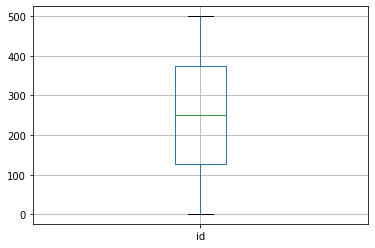

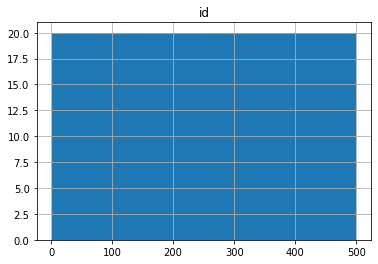

In [19]:
print(df.boxplot(column = [df.columns[0]]))
print(df.hist(column = [df.columns[0]], bins=25))

Dilihat dari boxplot, "minimum", Q3, median, Q1, dan "maximum" memiliki 4 jarak yang sama besar.
Sehingga data kolom "ID" ini uniform, dapat divisualisasikan dari histogram yang menunjukkan frekuensi sama tiap bin.
Maka data ini memiliki skew 0, sehingga rata ratanya sama dengan median.

### Daerah

AxesSubplot(0.125,0.125;0.775x0.755)
[[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020BBEF5F348>]]


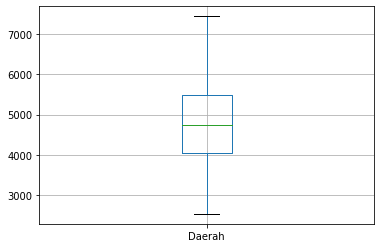

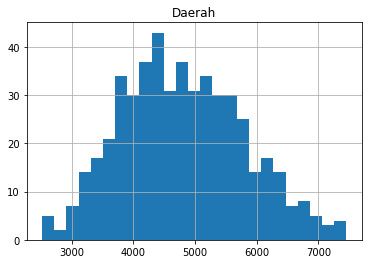

In [20]:
print(df.boxplot(column = [df.columns[1]]))
print(df.hist(column = [df.columns[1]], bins=25))

Dilihat dari boxplot, jangkauan antara "minimum" dan "maximum" kurang lebih sama dengan empat kali Inter Quartil Range.
Sehingga data kolom "Daerah" ini mendekati distribusi normal.
Dapat dilihat pula nilai median, ditunjukkan pada garis hijau pada boxplot, condong lebih dekat pada "minimum".
Sehingga dapat disimpulkan bahwa data ini memiliki skew positif, dapat divisualisasikan pada histogram yang memiliki frekuensi data lebih berat di bagian kiri.

### Sumbu Utama

AxesSubplot(0.125,0.125;0.775x0.755)
[[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020BBF06D208>]]


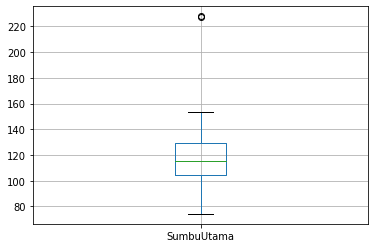

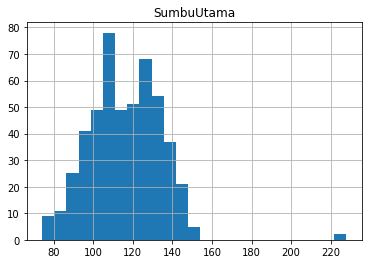

In [21]:
print(df.boxplot(column = [df.columns[2]]))
print(df.hist(column = [df.columns[2]], bins=25))

Dilihat dari boxplot, jangkauan antara "minimum" dan "maximum" kurang lebih sama dengan empat kali Inter Quartil Range.
Sehingga data kolom "SumbuKecil" ini tidak jauh dari distribusi normal.
Data ini juga mempunyai pencilan pada kedua sisi, sesuai dengan definisi data distribusi normal yang umumnya memiliki 0.35 persen pencilan pada kedua sisi.
Dapat disimpulkan bahwa kolom ini paling dekat dengan bentuk distribusi normal, dapat divisualisasikan dalam histogram.
Sehingga dapat disimpulkan bahwa data ini memiliki skew mendekati 0, karena median kurang lebih berada di tengah "minimum" dan "maksimum"
Dapat divisualisasikan pada histogram yang memiliki frekuensi data seimbang di kiri dan kanan (tidak memperhitungkan pencilan).

### Sumbu Kecil

AxesSubplot(0.125,0.125;0.775x0.755)
[[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020BBF19E148>]]


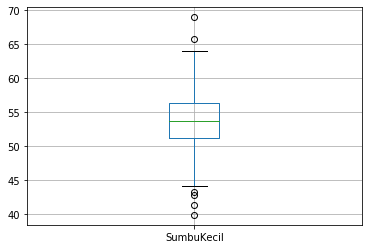

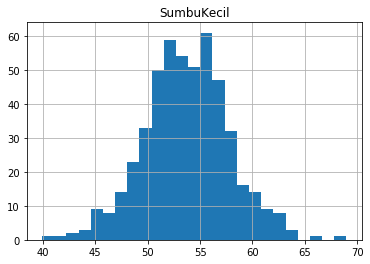

In [22]:
print(df.boxplot(column = [df.columns[3]]))
print(df.hist(column = [df.columns[3]], bins=25))

Dilihat dari boxplot, jangkauan antara "minimum" dan "maximum" kurang lebih sama dengan empat kali Inter Quartil Range.
Sehingga data kolom "SumbuKecil" ini tidak jauh dari distribusi normal.
Data ini juga mempunyai pencilan pada kedua sisi, sesuai dengan definisi data distribusi normal yang umumnya memiliki 0.35 persen pencilan pada kedua sisi.
Dapat disimpulkan bahwa kolom ini paling dekat dengan bentuk distribusi normal, dapat divisualisasikan dalam histogram.
Sehingga dapat disimpulkan bahwa data ini memiliki skew mendekati 0, karena median kurang lebih berada di tengah "minimum" dan "maksimum"
Dapat divisualisasikan pada histogram yang memiliki frekuensi data seimbang di kiri dan kanan (tidak memperhitungkan pencilan).

### Keunikan

AxesSubplot(0.125,0.125;0.775x0.755)
[[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020BBF28A848>]]


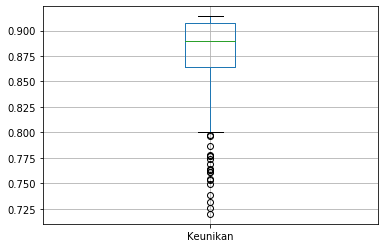

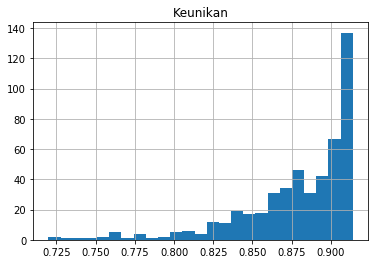

In [23]:
print(df.boxplot(column = [df.columns[4]]))
print(df.hist(column = [df.columns[4]], bins=25))

Dilihat dari boxplot, nilai "maximum" data tidak sama dengan Q3 + 1.5*IQR, serta memiliki pencilan sangat banyak dibawah nilai "minimum".
Data kolom "Keunikan" ini jauh dari distribusi normal.
Nilai median yang jauh lebih dekat pada "maksimum" juga menggambarkan skew bernilai negatif dan jauh dari 0.
Dapat divisualisasikan pada histogram yang memiliki frekuensi lebih berat pada bagian kanan.

### Area Bulatan

AxesSubplot(0.125,0.125;0.775x0.755)
[[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020BBF01ABC8>]]


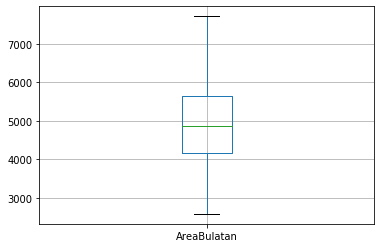

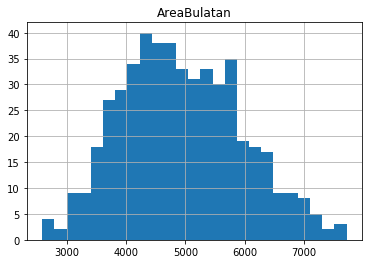

In [24]:
print(df.boxplot(column = [df.columns[5]]))
print(df.hist(column = [df.columns[5]], bins=25))

Dilihat dari boxplot, jangkauan antara "minimum" dan "maximum" kurang lebih sama dengan empat kali Inter Quartil Range.
Sehingga data kolom "AreaBulatan" ini mendekati distribusi normal.
Dapat dilihat pula nilai median, ditunjukkan pada garis hijau pada boxplot, condong lebih dekat pada "minimum".
Sehingga dapat disimpulkan bahwa data ini memiliki skew positif, 
dapat divisualisasikan pada histogram yang memiliki frekuensi data lebih berat di bagian kiri.

### Diameter

AxesSubplot(0.125,0.125;0.775x0.755)
[[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020BBF110788>]]


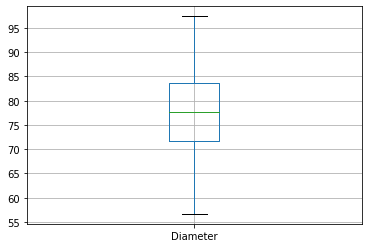

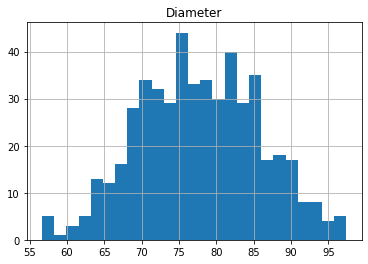

In [25]:
print(df.boxplot(column = [df.columns[6]]))
print(df.hist(column = [df.columns[6]], bins=25))

Dilihat dari boxplot, jangkauan antara "minimum" dan "maximum" kurang lebih sama dengan empat kali Inter Quartil Range.
Sehingga data kolom "Diameter" ini mendekati distribusi normal.
Dapat dilihat pula nilai median, ditunjukkan pada garis hijau pada boxplot, memiliki jarak yang sama ke "minimum" dan "maksimum"..
Sehingga dapat disimpulkan bahwa data ini memiliki skew yang dekat dengan 0, 
dapat divisualisasikan pada histogram yang memiliki frekuensi data seimbang di bagian kiri dan kanan.

### KadarAir

AxesSubplot(0.125,0.125;0.775x0.755)
[[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020BBF067FC8>]]


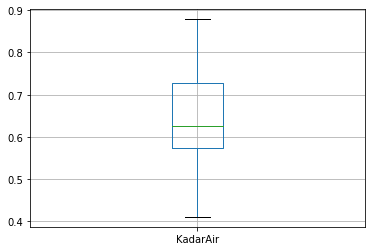

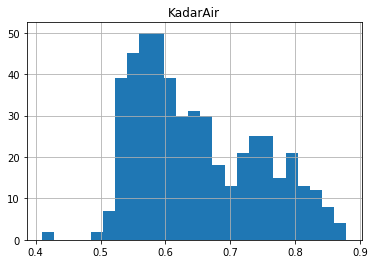

In [26]:
print(df.boxplot(column = [df.columns[7]]))
print(df.hist(column = [df.columns[7]], bins=25))

Dilihat dari boxplot, nilai median data jauh lebih dekat pada Q1 dibanding Q3.
Data yang terlihat terpisah pada histogram bagian kiri juga tidak dihitung sebagai pencilan karena memiliki frekuensi cukup besar.
Data kolom "KadarAir" ini jauh dari distribusi normal.
Nilai median yang jauh lebih dekat pada Q1 juga menggambarkan skew bernilai positif dan jauh dari 0.
Dapat divisualisasikan pada histogram yang memiliki frekuensi lebih berat pada bagian kiri.

### Keliling

AxesSubplot(0.125,0.125;0.775x0.755)
[[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020BBF2D7708>]]


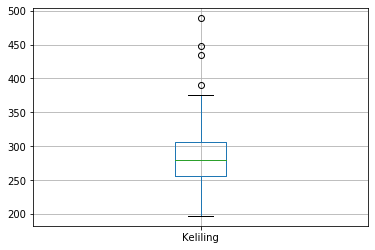

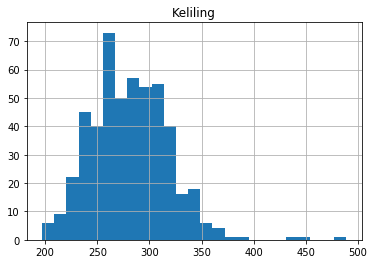

In [27]:
print(df.boxplot(column = [df.columns[8]]))
print(df.hist(column = [df.columns[8]], bins=25))

Dilihat dari boxplot, jangkauan antara "minimum" dan "maximum" kurang lebih sama dengan empat kali Inter Quartil Range.
Sehingga data kolom "Keliling" ini mendekati distribusi normal.
Data ini juga memiliki pencilan karena terdapat data bernilai di atas "maksimum" dengan frekuensi signifikan.
Nilai median yang lebih dekat pada "minimum" juga menggambarkan skew bernilai positif.
Dapat divisualisasikan pada histogram yang memiliki frekuensi lebih berat pada bagian kiri (tidak memperhitungkan pencilan).

### Bulatan

AxesSubplot(0.125,0.125;0.775x0.755)
[[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020BBF3FB4C8>]]


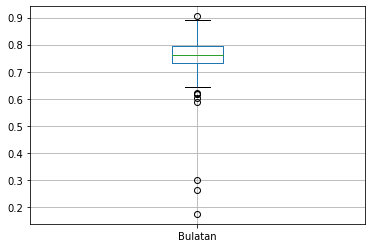

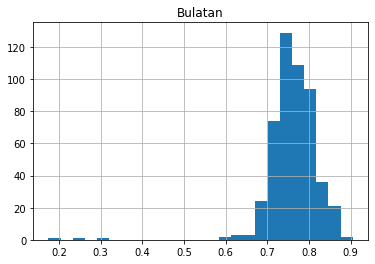

In [28]:
print(df.boxplot(column = [df.columns[9]]))
print(df.hist(column = [df.columns[9]], bins=25))

Dilihat dari boxplot, jangkauan antara "minimum" dan "maximum" kurang lebih sama dengan empat kali Inter Quartil Range.
Sehingga data kolom "Bulatan" ini mendekati distribusi normal.
Data ini juga memiliki pencilan karena terdapat data di atas "maksimum" dan di bawah "minimum" dengan lebih dominan yang di bawah.
Nilai median yang lebih dekat pada "minimum" juga menggambarkan skew bernilai positif.
Dapat divisualisasikan pada histogram yang memiliki frekuensi lebih berat pada bagian kiri (tidak memperhitungkan pencilan).

### Ransum

AxesSubplot(0.125,0.125;0.775x0.755)
[[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020BBF366C48>]]


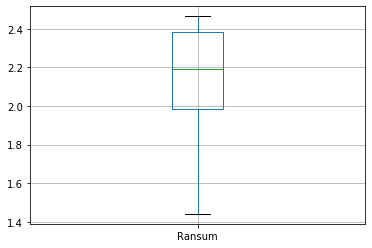

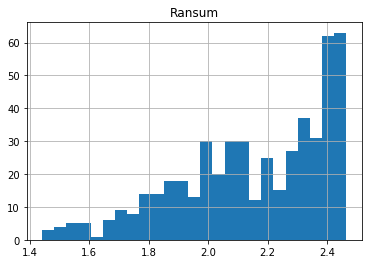

In [29]:
print(df.boxplot(column = [df.columns[10]]))
print(df.hist(column = [df.columns[10]], bins=25))

Dilihat dari boxplot, nilai "maximum" data tidak sama dengan Q3 + 1.5*IQR, serta memiliki pencilan sangat banyak dibawah nilai "minimum".
Data kolom "Ransum" ini jauh dari distribusi normal.
Nilai median yang jauh lebih dekat pada "maksimum" juga menggambarkan skew bernilai negatif dan jauh dari 0.
Dapat divisualisasikan pada histogram yang memiliki frekuensi lebih berat pada bagian kanan.

### Kelas

AxesSubplot(0.125,0.125;0.775x0.755)
[[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020BBF3746C8>]]


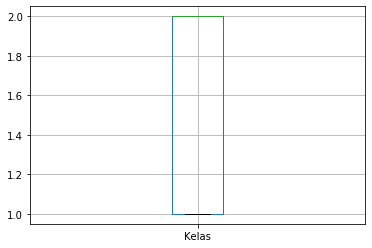

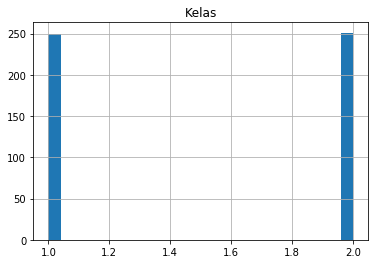

In [73]:
print(df.boxplot(column = [df.columns[11]]))
print(df.hist(column = [df.columns[11]], bins=25))

Kolom ini hanya memiliki nilai 1 dan 2, tepatnya 250 buah 1 dan 250 buah 2, sehingga tidak heran bahwa menghasilkan boxplot dan histogram sesuai gambar di atas

# Nomor 3

Menentukan setiap kolom numerik berdistribusi normal atau tidak. Gunakan normality test
yang dikaitkan dengan histogram plot.

Normality test dilakukan dengan menggunakan fungsi ```normaltest``` dari library scipy. Implementasi normality test jenis ini didasarkan pada **D'Agostino-Pearson Test**. 

Tes D'Agostino-Pearson, atau disebut juga Omnibus D'Agostino, dilakukan dengan menggabungkan hasil tes skewness dan kurtosis D'Agostino. Rumusnya diberikan sebagai berikut:$$K^2 = Z_s^2 + Z_k^2$$

$Z_s^2$ adalah z-score dari tes skewness D'Agostino dan $Z_k^2$ adalah z-score dari tes kurtosis D'Agostino. Jika hipotesis null terbukti, $K^2$ diaproksimasi terdistribusi chi-squared dengan derajat kebebasan 2.

Dalam soal ini, diambil hipotesis null ($H_0$) yaitu data terdistribusi normal. $H_0$ diuji dengan membandingkan nilai $\alpha$ yang ditetapkan sebesar 0.05 dengan p-value yang didapat dari ```normaltest```. $H_0$ akan diterima jika p-value lebih besar dari $\alpha$ dan akan ditolak jika p-value lebih kecil dari $\alpha$.

Untuk membantu pembuktian hasil normality test, ditampilkan pula histogram distribusi data dengan fungsi ```distplot``` dari library seaborn. Data yang terdistribusi normal akan menghasilkan histogram berbentuk kurva simetris (bell curve).

In [31]:
from scipy.stats import normaltest

def normality_test(df):
    k2, p = normaltest(df)
    print("P-value yang didapat sebesar", p)
    if (p < 0.05):
        print("Hipotesis nol ditolak. Data tidak terdistribusi normal.")
    else:
        print("Hipotesis nol diterima. Data terdistribusi normal.")
    sns.distplot(df)

### id

P-value yang didapat sebesar 1.1693020376929758e-69
Hipotesis nol ditolak. Data tidak terdistribusi normal.


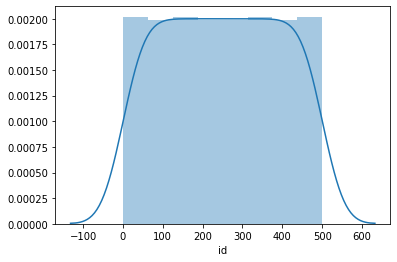

In [32]:
normality_test(df["id"])

Kurva tidak memiliki skewness dan terlihat memiliki puncak yang datar. Hal ini adalah cerminan dari nilai kurtosis kolom id yang negatif.

### Daerah

P-value yang didapat sebesar 0.004386271773193838
Hipotesis nol ditolak. Data tidak terdistribusi normal.


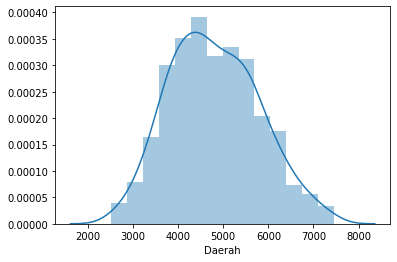

In [33]:
normality_test(df["Daerah"])

Skewness kurva cenderung positif dengan nilai kurtosis yang kecil

### SumbuUtama

P-value yang didapat sebesar 2.2127429343273333e-21
Hipotesis nol ditolak. Data tidak terdistribusi normal.


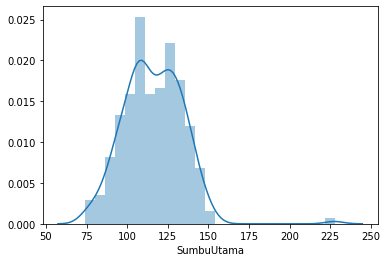

In [34]:
normality_test(df["SumbuUtama"])

Kurva terlihat jelas memiliki skewness positif dengan kurtosis yang cukup besar, terlihat dari adanya tail di daerah kanan.

### SumbuKecil

P-value yang didapat sebesar 0.1573634413290252
Hipotesis nol diterima. Data terdistribusi normal.


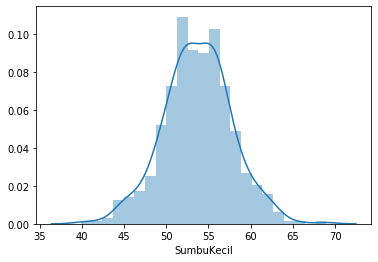

In [35]:
normality_test(df["SumbuKecil"])

Bentuk kurva simetris mengikuti bell curve, sehingga dapat disimpulkan distribusi datanya normal.

### Keunikan

P-value yang didapat sebesar 3.602971140062405e-35
Hipotesis nol ditolak. Data tidak terdistribusi normal.


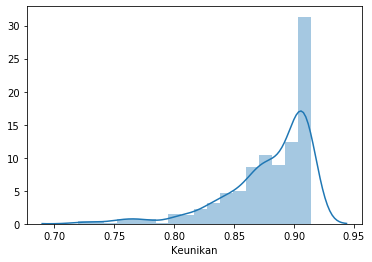

In [36]:
normality_test(df["Keunikan"])

Kurva jelas terlihat memiliki skewness negatif karena frekuensi terbesar ada di bagian kiri kurva.

### AreaBulatan

P-value yang didapat sebesar 0.004657058890055043
Hipotesis nol ditolak. Data tidak terdistribusi normal.


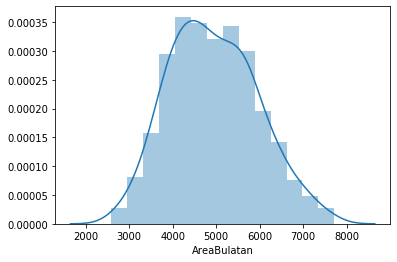

In [37]:
normality_test(df["AreaBulatan"])

Kurva memiliki skewness yang cenderung positif dengan nilai kurtosis yang tidak terlalu besar.

### Diameter

P-value yang didapat sebesar 0.024157198077543095
Hipotesis nol ditolak. Data tidak terdistribusi normal.


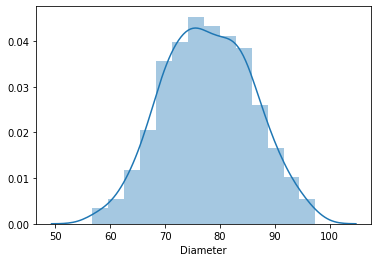

In [38]:
normality_test(df["Diameter"])

Kurva cenderung memiliki skewness positif meskipun sangat kecil. Nilai kurtosisnya yang kecil juga memberikan ilusi bahwa data terdistribusi normal meskipun sebenarnya tidak demikian.

### KadarAir

P-value yang didapat sebesar 2.5869363404624707e-11
Hipotesis nol ditolak. Data tidak terdistribusi normal.


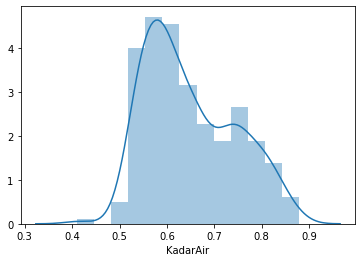

In [39]:
normality_test(df["KadarAir"])

Kurva memiliki skewness positif dengan kurtosis yang negatif, terlihat dari bentuk kurva yang cukup lebar.

### Keliling

P-value yang didapat sebesar 2.2390130437166565e-15
Hipotesis nol ditolak. Data tidak terdistribusi normal.


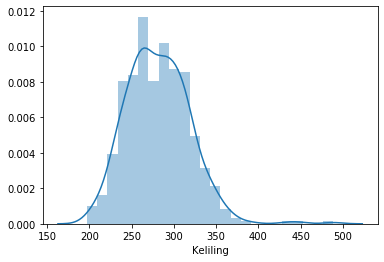

In [40]:
normality_test(df["Keliling"])

Terlihat kurva memiliki skewness positif dan kurtosis yang besar dengan adanya tail di bagian kanan kurva.

### Bulatan

P-value yang didapat sebesar 9.885276103161724e-97
Hipotesis nol ditolak. Data tidak terdistribusi normal.


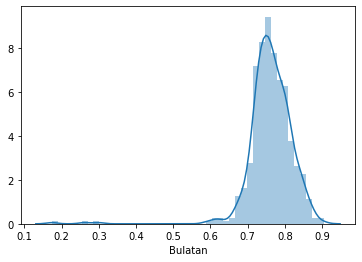

In [41]:
normality_test(df["Bulatan"])

Skewness negatif terlihat cukup jelas di kurva dan kurtosis yang sangat besar juga terlihat dari tail yang panjang di sisi kiri.

### Ransum

P-value yang didapat sebesar 8.963008041823752e-09
Hipotesis nol ditolak. Data tidak terdistribusi normal.


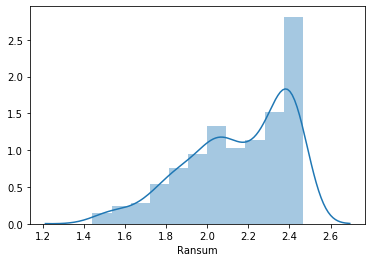

In [42]:
normality_test(df["Ransum"])

Kurva memiliki skewness negatif dengan kurtosis yang cukup kecil.

### Kelas

P-value yang didapat sebesar 0.0
Hipotesis nol ditolak. Data tidak terdistribusi normal.


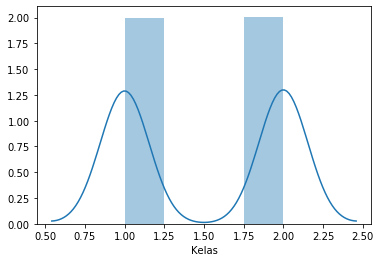

In [43]:
normality_test(df["Kelas"])

Kolom Kelas hanya memiliki 2 nilai yaitu "1" dan "2" sehingga kurva terlihat jelas memiliki dua maksima.

# Nomor 4

Melakukan test hipotesis 1 sampel, dengan menuliskan 6 langkah testing dan menampilkan
juga boxplotnya untuk kolom/bagian yang bersesuaian.

In [44]:
import scipy.stats as st

### a. Nilai rata-rata Daerah di atas 4700?

In [45]:
print("Langkah 1: Hiposesis H_0 yang kami ambil ialah mu_0 = 4700")
H_0 = "rata-rata kolom daerah bernilai 4700"
print("Langkah 2: Hiposesis H_1 yang kami ambil ialah mu_0 > 4700")
H_1 = "rata-rata kolom daerah lebih 4700"
print("Langkah 3: Tingkat signifikan a yang kami ambil ialah 0.05")
a = 0.05
print("Langkah 4: Uji statistik yang sesuai ialah dengan mengambil z = (mean - mu_0)/(std/(n**0.5)), karena mean dan std populasi diketahui. Serta karena H_1 ialah mu_0 > 4700, maka daerah kritis ialah z > z_a = z_0.95")
z_a = st.norm.ppf(.95)
print("z_a =",z_a)
def isKritis(p, a):
    return p < a
print("Langkah 5:")
mu_0 = 4700
mean = df["Daerah"].mean()
std = df["Daerah"].std()
n = len(df["Daerah"])
print("xbar =", mean, ", std =", std, ", n =", n)
z = (mean - mu_0)/(std/(n**0.5))
print("z =",z)
p = 1 - st.norm.cdf(z)
print("p-value =", p)
print("Langkah 6:")
if isKritis(p, a):
    print("Karena berada dalam daerah kritis, hipotesis H_0 ditolak sehingga " + H_1)
else:
    print("Karena tidak berada dalam daerah kritis, hipotesis H_0 diterima sehingga " + H_0)

Langkah 1: Hiposesis H_0 yang kami ambil ialah mu_0 = 4700
Langkah 2: Hiposesis H_1 yang kami ambil ialah mu_0 > 4700
Langkah 3: Tingkat signifikan a yang kami ambil ialah 0.05
Langkah 4: Uji statistik yang sesuai ialah dengan mengambil z = (mean - mu_0)/(std/(n**0.5)), karena mean dan std populasi diketahui. Serta karena H_1 ialah mu_0 > 4700, maka daerah kritis ialah z > z_a = z_0.95
z_a = 1.6448536269514722
Langkah 5:
xbar = 4801.246 , std = 986.3954914816018 , n = 500
z = 2.295153824252517
p-value = 0.010862155196799894
Langkah 6:
Karena berada dalam daerah kritis, hipotesis H_0 ditolak sehingga rata-rata kolom daerah lebih 4700


### b. Nilai Rata-rata Sumbu Utama tidak sama dengan 116?

In [46]:
print("Langkah 1: Hiposesis H_0 yang kami ambil ialah mu_0 = 116")
H_0 = "rata-rata kolom sumbu utama bernilai 116"
print("Langkah 2: Hiposesis H_1 yang kami ambil ialah mu_0 != 116")
H_1 = "rata-rata kolom sumbu utama tidak sama dengan 116"
print("Langkah 3: Tingkat signifikan a yang kami ambil ialah 0.05")
a = 0.05
print("a =", a)
print("Langkah 4: Uji statistik yang sesuai ialah dengan mengambil z = (mean - mu_0)/(std/(n**0.5)), ")
print("karena mean dan std populasi diketahui. Serta karena H_1 ialah mu_0 != 116, maka daerah kritis ialah z > z_a/2 atau z < -z_a/2")
z_adiv2 = st.norm.ppf(.975)
print("z_a/2 =",z_adiv2)
print("Langkah 5:")
mu_0 = 116
mean = df["SumbuUtama"].mean()
std = df["SumbuUtama"].std()
n = len(df["SumbuUtama"])
print("xbar =", mean, ", std =", std, ", n =", n)
z = (mean - mu_0)/(std/(n**0.5))
print("z =",z)
p = 2*(1-st.norm.cdf(z))
print("p-value =", p)
#Langkah 6:
if (p < a):
    print("Karena berada dalam daerah kritis, hipotesis H_0 ditolak sehingga " + H_1)
else:
    print("Karena tidak berada dalam daerah kritis, hipotesis H_0 diterima sehingga " + H_0)

Langkah 1: Hiposesis H_0 yang kami ambil ialah mu_0 = 116
Langkah 2: Hiposesis H_1 yang kami ambil ialah mu_0 != 116
Langkah 3: Tingkat signifikan a yang kami ambil ialah 0.05
a = 0.05
Langkah 4: Uji statistik yang sesuai ialah dengan mengambil z = (mean - mu_0)/(std/(n**0.5)), 
karena mean dan std populasi diketahui. Serta karena H_1 ialah mu_0 != 116, maka daerah kritis ialah z > z_a/2 atau z < -z_a/2
z_a/2 = 1.959963984540054
Langkah 5:
xbar = 116.04517136778003 , std = 18.28262595755936 , n = 500
z = 0.055247123267335795
p-value = 0.9559415872977244
Karena tidak berada dalam daerah kritis, hipotesis H_0 diterima sehingga rata-rata kolom sumbu utama bernilai 116


### c. Nilai Rata-rata 20 baris pertama kolom Sumbu Kecil bukan 50?

In [47]:
print(df['SumbuKecil'][:20])

0     58.470846
1     49.837688
2     52.151207
3     49.457349
4     55.757848
5     56.235398
6     61.312148
7     57.238214
8     52.493440
9     58.165177
10    49.993830
11    52.229608
12    50.306969
13    55.628979
14    57.264375
15    57.617554
16    56.655596
17    53.990675
18    56.984844
19    55.953780
Name: SumbuKecil, dtype: float64


In [48]:
print("Langkah 1: Hiposesis H_0 yang kami ambil ialah mu_0 = 50")
H_0 = "rata-rata kolom sumbu kecil bernilai 50"
print("Langkah 2: Hiposesis H_1 yang kami ambil ialah mu_0 != 50")
H_1 = "rata-rata kolom sumbu kecil tidak sama dengan 50"
print("Langkah 3: Tingkat signifikan a yang kami ambil ialah 0.05")
a = 0.05
print("a =", a)
print("Langkah 4: Uji statistik yang sesuai ialah dengan mengambil t = (mean - mu_0)/(s/(n**0.5)), ")
print("karena std tidak diketahui. Serta karena H_1 ialah p < 0.05, maka daerah kritis ialah t > t_a dan t < -t_a")
v = 19
print("derajat kebebasan =", v)
t_adiv2 = st.t.ppf(.95, v)
print("t_a/2 =",t_adiv2)
print("Langkah 5:")
mu_0 = 50
mean = df["SumbuKecil"][:20].mean()
s = df["SumbuKecil"][:20].std()
n = 20
print("xbar =", mean, ", s =", s, ", n =", n)
t = (mean - mu_0)/(s/(n**0.5))
print("t =",t)
p = 2*(1-st.t.cdf(t, v))
print("p-value =", p)
#Langkah 6:
if (p < a):
    print("Karena berada dalam daerah kritis, hipotesis H_0 ditolak sehingga " + H_1)
else:
    print("Karena tidak berada dalam daerah kritis, hipotesis H_0 diterima sehingga " + H_0)

Langkah 1: Hiposesis H_0 yang kami ambil ialah mu_0 = 50
Langkah 2: Hiposesis H_1 yang kami ambil ialah mu_0 != 50
Langkah 3: Tingkat signifikan a yang kami ambil ialah 0.05
a = 0.05
Langkah 4: Uji statistik yang sesuai ialah dengan mengambil t = (mean - mu_0)/(s/(n**0.5)), 
karena std tidak diketahui. Serta karena H_1 ialah p < 0.05, maka daerah kritis ialah t > t_a dan t < -t_a
derajat kebebasan = 19
t_a/2 = 1.729132811521367
Langkah 5:
xbar = 54.887276260499995 , s = 3.373879898276029 , n = 20
t = 6.478168916968886
p-value = 3.302018564577125e-06
Karena berada dalam daerah kritis, hipotesis H_0 ditolak sehingga rata-rata kolom sumbu kecil tidak sama dengan 50


### d. Proporsi nilai Diameter yang lebih dari 85, adalah tidak sama dengan 15% ?

In [49]:
print("Langkah 1: Hiposesis H_0 yang kami ambil ialah p = 0.15")
H_0 = "persentase diameter yang lebih dari 85 ialah 15"
print("Langkah 2: Hiposesis H_1 yang kami ambil ialah p != 0.15")
H_1 = "persentase diameter yang lebih dari 85 bukan 15"
print("Langkah 3: Tingkat signifikan a yang kami ambil ialah 0.05")
a = 0.05
print("a =", a)
print("Langkah 4: Uji statistik yang sesuai ialah dengan mengambil z = (x - n*p0)/((n*p0*q0)**0.5), ")
print("karena mean dan std populasi diketahui. Serta karena H_1 ialah p != 0.15, maka daerah kritis ialah z > z_a/2 atau z < -z_a/2")
z_adiv2 = st.norm.ppf(.975)
print("z_a/2 =",z_adiv2)
print("Langkah 5:")
x = 0
n = len(df["Diameter"])
for i in range (n):
    if(df["Diameter"][i] > 85):
        x += 1
p0 = 0.15
q0 = 1 - p0
print("x =", x, ", p0 =", p0, ", q0 =", q0)
z = (x - n*p0)/((n*p0*q0)**0.5)
print("z =",z)
p = 2*(1-st.norm.cdf(z))
print("p-value =", p)
#Langkah 6:
if (p < a):
    print("Karena berada dalam daerah kritis, hipotesis H_0 ditolak sehingga " + H_1)
else:
    print("Karena tidak berada dalam daerah kritis, hipotesis H_0 diterima sehingga " + H_0)

Langkah 1: Hiposesis H_0 yang kami ambil ialah p = 0.15
Langkah 2: Hiposesis H_1 yang kami ambil ialah p != 0.15
Langkah 3: Tingkat signifikan a yang kami ambil ialah 0.05
a = 0.05
Langkah 4: Uji statistik yang sesuai ialah dengan mengambil z = (x - n*p0)/((n*p0*q0)**0.5), 
karena mean dan std populasi diketahui. Serta karena H_1 ialah p != 0.15, maka daerah kritis ialah z > z_a/2 atau z < -z_a/2
z_a/2 = 1.959963984540054
Langkah 5:
x = 97 , p0 = 0.15 , q0 = 0.85
z = 2.7553868807746578
p-value = 0.005862277168409591
Karena berada dalam daerah kritis, hipotesis H_0 ditolak sehingga persentase diameter yang lebih dari 85 bukan 15


### e. Proporsi nilai Keliling yang kurang dari 100, adalah kurang dari 5% ?

In [50]:
print("Langkah 1: Hiposesis H_0 yang kami ambil ialah p = 0.05")
H_0 = "persentase keliling yang kurang dari 100 ialah 5"
print("Langkah 2: Hiposesis H_1 yang kami ambil ialah p < 0.05")
H_1 = "persentase keliling yang kurang dari 100 kurang dari 5"
print("Langkah 3: Tingkat signifikan a yang kami ambil ialah 0.05")
a = 0.05
print("a =", a)
print("Langkah 4: Uji statistik yang sesuai ialah dengan mengambil z = (x - n*p0)/((n*p0*q0)**0.5), ")
print("karena mean dan std populasi diketahui. Serta karena H_1 ialah p < 0.05, maka daerah kritis ialah z < -z_a")
z_a = st.norm.ppf(.95)
print("z_a =",z_a)
def isKritis(p, a):
    return p < a
print("Langkah 5:")
x = 0
n = len(df["Keliling"])
for i in range (n):
    if(df["Keliling"][i] < 100):
        x += 1
p0 = 0.05
q0 = 1 - p0
print("x =", x, ", p0 =", p0, ", q0 =", q0)
z = (x - n*p0)/((n*p0*q0)**0.5)
print("z =",z)
p = st.norm.cdf(z)
print("p-value =", p)
#Langkah 6:
if isKritis(p, a):
    print("Karena berada dalam daerah kritis, hipotesis H_0 ditolak sehingga " + H_1)
else:
    print("Karena tidak berada dalam daerah kritis, hipotesis H_0 diterima sehingga " + H_0)

Langkah 1: Hiposesis H_0 yang kami ambil ialah p = 0.05
Langkah 2: Hiposesis H_1 yang kami ambil ialah p < 0.05
Langkah 3: Tingkat signifikan a yang kami ambil ialah 0.05
a = 0.05
Langkah 4: Uji statistik yang sesuai ialah dengan mengambil z = (x - n*p0)/((n*p0*q0)**0.5), 
karena mean dan std populasi diketahui. Serta karena H_1 ialah p < 0.05, maka daerah kritis ialah z < -z_a
z_a = 1.6448536269514722
Langkah 5:
x = 0 , p0 = 0.05 , q0 = 0.95
z = -5.129891760425771
p-value = 1.4495441414387716e-07
Karena berada dalam daerah kritis, hipotesis H_0 ditolak sehingga persentase keliling yang kurang dari 100 kurang dari 5


# Nomor 5

Melakukan test hipotesis 2 sampel, dengan menuliskan 6 langkah testing dan menampilkan
juga boxplotnya untuk kolom/bagian yang bersesuaian.

ASUMSI: Seluruh data yang digunakan berdistribusi normal.

### a. Data kolom AreaBulatan dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?

Misal:

$A_1$: Data AreaBulatan bagian awal kolom

$A_2$: Data AreaBulatan bagian akhir kolom

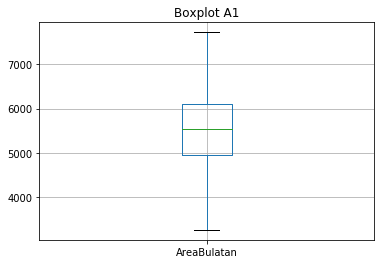

In [51]:
ax = df.loc[:249].boxplot(["AreaBulatan"])
ax.set_title("Boxplot A1")
plt.show()

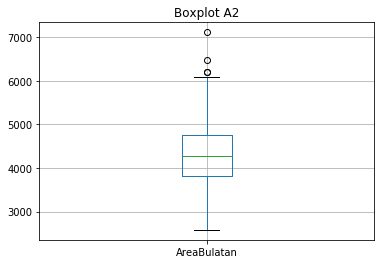

In [52]:
ax = df.loc[250:].boxplot(["AreaBulatan"])
ax.set_title("Boxplot A2")
plt.show()

Pertama ditentukan terlebih dahulu hipotesis nol $H_0$ sebagai berikut:

$H_0$: $\mu_{A_1} = \mu_{A_2}$

Hipotesis nol yang ditetapkan adalah rata-rata data bagian awal kolom sama dengan rata-rata data bagian akhir kolom.

Selanjutnya ditentukan hipotesis alternatif $H_1$ sebagai berikut:

$H_1$: $\mu_{A_1} \neq \mu_{A_2}$

Hipotesis alternatif yang ditetapkan adalah rata-rata data bagian awal kolom tidak sama dengan rata-rata data bagian akhir kolom. Hal ini berarti rata-rata $A_1$ dapat lebih besar atau lebih kecil dari rata-rata $A_2$.

Tingkat signifikansi $\alpha$ ditetapkan dengan:

$\alpha = 0.05$

Tes statistik dilakukan dengan **t-distribution** atau disebut juga Student's t-test. Daerah kritisnya diberikan sebagai berikut:
$$ t < -t_{\alpha/2}(v) \quad or \quad t > t_{\alpha/2}(v)$$ 
$v =$ derajat kebebasan $= n_{A_1} + n_{A_2} - 2$

Hitung v

$n_{A_1} = 250$

$n_{A_2} = 250$

$v = 250 + 250 - 2 = 498$

Cari batasan daerah kritis dengan bantuan modul ```scipy.stats```:

In [53]:
from scipy.stats import t

# rumus: t.ppf(alpha/2, v)
a = t.ppf(0.025, 498)
print("Batas bawah :", round(a, 4))
print("Batas atas :", round(-a, 4))

Batas bawah : -1.9647
Batas atas : 1.9647


Didapatkan daerah kritisnya adalah $ t < -1.9647 \quad or \quad t > 1.9647$

Nilai $t$ harus berada di luar daerah kritis supaya $H_0$ diterima. Rumus $t$ diberikan sebagai berikut:
$$\Large t = \Large\frac{(\bar{X_1} - \bar{X_2})-(\mu_1 - \mu_2)}{\sqrt{\Large\frac{s_1^2}{\Large n_{1}} + \Large\frac{s_2^2}{\Large n_{2}}}}$$
$\bar{X_1}$ : rata-rata sampel $A_1$

$\bar{X_2}$ : rata-rata sampel $A_2$

$\mu_1$ : rata-rata populasi $A_1$

$\mu_2$ : rata-rata populasi $A_2$

$S_1^2$ : variansi sampel $A_1$

$S_2^2$ : variansi sampel $A_2$

Dari hipotesis, $\mu_{A_1} = \mu_{A_2}$ maka $\mu_{A_1} - \mu_{A_2} = 0$.

Cari nilai $\bar{X_1}$, $\bar{X_2}$, $S_1^2$, dan $S_2^2$

In [54]:
x1 = df.loc[:249, "AreaBulatan"].mean()
x2 = df.loc[250:, "AreaBulatan"].mean()
s1 = df.loc[:249, "AreaBulatan"].var()
s2 = df.loc[250:, "AreaBulatan"].var()
print("Rata-rata A1 :", x1)
print("Rata-rata A2 :", x2)
print("Variansi A1 :", s1)
print("Variansi A2 :", s2)

Rata-rata A1 : 5549.804
Rata-rata A2 : 4324.292
Variansi A1 : 751733.1060080321
Variansi A2 : 545480.4244337347


Lakukan komputasi untuk mencari nilai $t$

In [55]:
from math import sqrt

t_value = (x1 - x2) / sqrt((s1/250) + (s2/250))
print("Nilai t :", round(t_value, 4))

Nilai t : 17.013


Nilai $t$ yang didapat berada di dalam daerah kritis ($17.013 > 1.9647$). Oleh karena itu, keputusan yang diambil adalah **menolak $H_0$**. Kesimpulan yang didapat adalah ketika data kolom AreaBulatan dibagi dua sama rata, **rata-rata bagian awal kolom tidak sama dengan rata-rata bagian akhir kolom**.

### b. Data kolom Kadar Air dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.2?

Misal:

$A_1$: Data KadarAir bagian awal kolom

$A_2$: Data KadarAir bagian akhir kolom

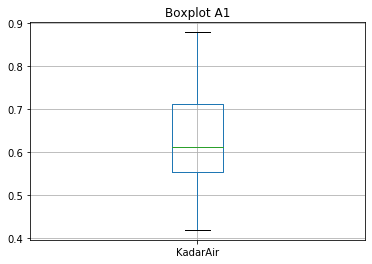

In [56]:
ax = df.loc[:249].boxplot(["KadarAir"])
ax.set_title("Boxplot A1")
plt.show()

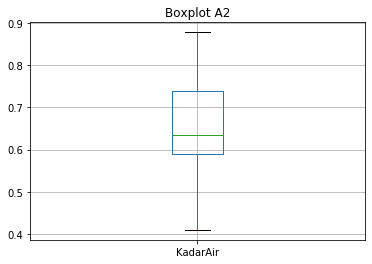

In [57]:
ax = df.loc[250:].boxplot(["KadarAir"])
ax.set_title("Boxplot A2")
plt.show()

Pertama ditentukan terlebih dahulu hipotesis nol $H_0$ sebagai berikut:

$H_0$: $\mu_{A_1} = (\mu_{A_2} + 0.2)$

Hipotesis nol yang ditetapkan adalah rata-rata data bagian awal kolom sama dengan rata-rata data bagian akhir kolom ditambah $0.2$.

Selanjutnya ditentukan hipotesis alternatif $H_1$ sebagai berikut:

$H_1$: $\mu_{A_1} \neq (\mu_{A_2} + 0.2)$

Hipotesis alternatif yang ditetapkan adalah rata-rata data bagian awal kolom tidak sama dengan rata-rata data bagian akhir kolom ditambah $0.2$. Hal ini berarti rata-rata $A_1$ dapat lebih besar atau lebih kecil dari rata-rata $A_2$ ditambah $0.2$.

Tingkat signifikansi $\alpha$ ditetapkan dengan:

$\alpha = 0.05$

Tes statistik dilakukan dengan **t-distribution** atau disebut juga Student's t-test. Daerah kritisnya diberikan sebagai berikut:
$$ t < -t_{\alpha/2}(v) \quad or \quad t > t_{\alpha/2}(v)$$ 
$v =$ derajat kebebasan $= n_{A_1} + n_{A_2} - 2$

Hitung v

$n_{A_1} = 250$

$n_{A_2} = 250$

$v = 250 + 250 - 2 = 498$

Cari batasan daerah kritis dengan bantuan modul ```scipy.stats```:

In [58]:
# rumus: t.ppf(alpha/2, v)
a = t.ppf(0.025, 498)
print("Batas bawah :", round(a, 4))
print("Batas atas :", round(-a, 4))

Batas bawah : -1.9647
Batas atas : 1.9647


Didapatkan daerah kritisnya adalah $ t < -1.9647 \quad or \quad t > 1.9647$

Nilai $t$ harus berada di luar daerah kritis supaya $H_0$ diterima. Rumus $t$ diberikan sebagai berikut:
$$\Large t = \Large\frac{(\bar{X_1} - \bar{X_2})-(\mu_1 - \mu_2)}{\sqrt{\Large\frac{s_1^2}{\Large n_{1}} + \Large\frac{s_2^2}{\Large n_{2}}}}$$
$\bar{X_1}$ : rata-rata sampel $A_1$

$\bar{X_2}$ : rata-rata sampel $A_2$

$\mu_1$ : rata-rata populasi $A_1$

$\mu_2$ : rata-rata populasi $A_2$

$S_1^2$ : variansi sampel $A_1$

$S_2^2$ : variansi sampel $A_2$

Dari hipotesis, $\mu_{A_1} = (\mu_{A_2} + 0.2)$ maka $\mu_{A_1} - \mu_{A_2} = 0.2$.

Cari nilai $\bar{X_1}$, $\bar{X_2}$, $S_1^2$, dan $S_2^2$

In [59]:
x1 = df.loc[:249, "KadarAir"].mean()
x2 = df.loc[250:, "KadarAir"].mean()
s1 = df.loc[:249, "KadarAir"].var()
s2 = df.loc[250:, "KadarAir"].var()
print("Rata-rata A1 :", x1)
print("Rata-rata A2 :", x2)
print("Variansi A1 :", s1)
print("Variansi A2 :", s2)

Rata-rata A1 : 0.63574344072
Rata-rata A2 : 0.6609999030760001
Variansi A1 : 0.009043200047076563
Variansi A2 : 0.008482636662870607


Lakukan komputasi untuk mencari nilai $t$

In [60]:
t_value = (x1 - x2 - 0.2) / sqrt((s1/250) + (s2/250))
print("Nilai t :", round(t_value, 4))

Nilai t : -26.9034


Nilai $t$ yang didapat berada di dalam daerah kritis ($-26.9034 < -1.9647$). Oleh karena itu, keputusan yang diambil adalah **menolak $H_0$**. Kesimpulan yang didapat adalah ketika data kolom KadarAir dibagi dua sama rata, **rata-rata bagian awal kolom tidak lebih besar sejumlah 0.2 dibanding rata-rata bagian akhir kolom**.

### c. Rata-rata 20 baris pertama kolom Bulatan sama dengan 20 baris terakhirnya?

Misal:

$A_1$: Data 20 baris pertama kolom Bulatan

$A_2$: Data 20 baris terakhir kolom Bulatan

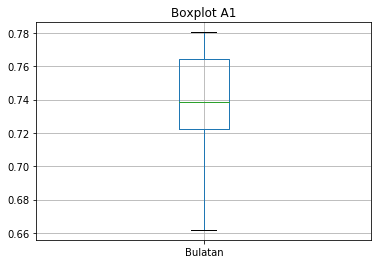

In [61]:
ax = df.loc[:19].boxplot(["Bulatan"])
ax.set_title("Boxplot A1")
plt.show()

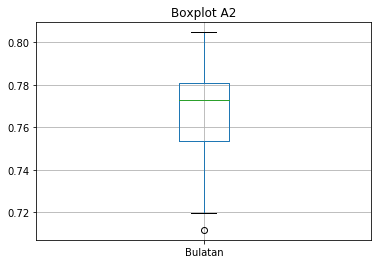

In [62]:
ax = df.loc[480:].boxplot(["Bulatan"])
ax.set_title("Boxplot A2")
plt.show()

Pertama ditentukan terlebih dahulu hipotesis nol $H_0$ sebagai berikut:

$H_0$: $\mu_{A_1} = \mu_{A_2}$

Hipotesis nol yang ditetapkan adalah rata-rata 20 baris pertama kolom Bulatan sama dengan rata-rata 20 baris terakhir kolom Bulatan.

Selanjutnya ditentukan hipotesis alternatif $H_1$ sebagai berikut:

$H_1$: $\mu_{A_1} \neq \mu_{A_2}$

Hipotesis alternatif yang ditetapkan adalah rata-rata 20 baris pertama kolom Bulatan tidak sama dengan rata-rata 20 baris terakhir kolom Bulatan. Hal ini berarti rata-rata $A_1$ dapat lebih besar atau lebih kecil dari rata-rata $A_2$.

Tingkat signifikansi $\alpha$ ditetapkan dengan:

$\alpha = 0.05$

Tes statistik dilakukan dengan **t-distribution** atau disebut juga Student's t-test. Daerah kritisnya diberikan sebagai berikut:
$$ t < -t_{\alpha/2}(v) \quad or \quad t > t_{\alpha/2}(v)$$ 
$v =$ derajat kebebasan $= n_{A_1} + n_{A_2} - 2$

Hitung v

$n_{A_1} = 20$

$n_{A_2} = 20$

$v = 20 + 20 - 2 = 38$

Cari batasan daerah kritis dengan bantuan modul ```scipy.stats```:

In [63]:
# rumus: t.ppf(alpha/2, v)
a = t.ppf(0.025, 38)
print("Batas bawah :", round(a, 4))
print("Batas atas :", round(-a, 4))

Batas bawah : -2.0244
Batas atas : 2.0244


Didapatkan daerah kritisnya adalah $ t < -2.0244 \quad or \quad t > 2.0244$

Nilai $t$ harus berada di luar daerah kritis supaya $H_0$ diterima. Rumus $t$ diberikan sebagai berikut:
$$\Large t = \Large\frac{(\bar{X_1} - \bar{X_2})-(\mu_1 - \mu_2)}{\sqrt{\Large\frac{s_1^2}{\Large n_{1}} + \Large\frac{s_2^2}{\Large n_{2}}}}$$
$\bar{X_1}$ : rata-rata sampel $A_1$

$\bar{X_2}$ : rata-rata sampel $A_2$

$\mu_1$ : rata-rata populasi $A_1$

$\mu_2$ : rata-rata populasi $A_2$

$S_1^2$ : variansi sampel $A_1$

$S_2^2$ : variansi sampel $A_2$

Dari hipotesis, $\mu_{A_1} = \mu_{A_2}$ maka $\mu_{A_1} - \mu_{A_2} = 0$.

Cari nilai $\bar{X_1}$, $\bar{X_2}$, $S_1^2$, dan $S_2^2$

In [64]:
x1 = df.loc[:19, "Bulatan"].mean()
x2 = df.loc[480:, "Bulatan"].mean()
s1 = df.loc[:19, "Bulatan"].var()
s2 = df.loc[480:, "Bulatan"].var()
print("Rata-rata A1 :", x1)
print("Rata-rata A2 :", x2)
print("Variansi A1 :", s1)
print("Variansi A2 :", s2)

Rata-rata A1 : 0.7375353552499999
Rata-rata A2 : 0.767322437
Variansi A1 : 0.0009232346025806985
Variansi A2 : 0.0006307661055759374


Lakukan komputasi untuk mencari nilai $t$

In [65]:
t_value = (x1 - x2) / sqrt((s1/20) + (s2/20))
print("Nilai t :", round(t_value, 4))

Nilai t : -3.3792


Nilai $t$ yang didapat berada di dalam daerah kritis ($-3.3792 < -2.0244$). Oleh karena itu, keputusan yang diambil adalah **menolak $H_0$**. Kesimpulan yang didapat adalah **rata-rata 20 baris pertama kolom Bulatan tidak sama dengan rata-rata 20 baris terakhir kolom Bulatan**.

### d. Proporsi nilai bagian awal Ransum yang lebih dari 2, adalah lebih besar daripada, proporsi nilai yang sama di bagian akhir Ransum?

Misal:

$X_1$: Data bagian awal kolom Ransum

$X_2$: Data bagian akhir kolom Ransum

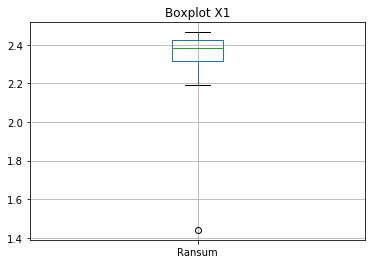

In [66]:
ax = df.loc[:249].boxplot(["Ransum"])
ax.set_title("Boxplot X1")
plt.show()

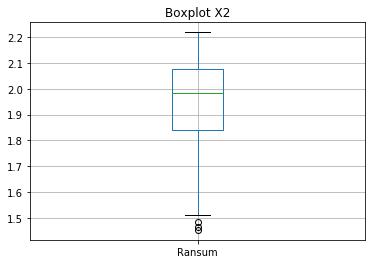

In [67]:
ax = df.loc[250:].boxplot(["Ransum"])
ax.set_title("Boxplot X2")
plt.show()

Pertama ditentukan terlebih dahulu hipotesis nol $H_0$ sebagai berikut:

$H_0$: $P(X_1 > 2) = P(X_2 > 2)$

Selanjutnya ditentukan hipotesis alternatif $H_1$ sebagai berikut:

$H_1$: $P(X_1 > 2) < P(X_2 > 2)$

Tingkat signifikansi $\alpha$ ditetapkan dengan:

$\alpha = 0.05$

Tes statistik dilakukan dengan **Z-test** yang diaproksimasi oleh distribusi **normal** (Gaussian). Batasan daerah kritisnya diberikan sebagai berikut:
$$ z < -z_{\alpha/2} \quad or \quad z > z_{\alpha/2}$$ 

Cari batasan daerah kritis dengan bantuan modul ```scipy.stats```:

### e. Bagian awal kolom Diameter memiliki variansi yang sama dengan bagian akhirnya?

Misal:

$A_1$: Data bagian awal kolom Diameter

$A_2$ Data bagian awal kolom Diameter

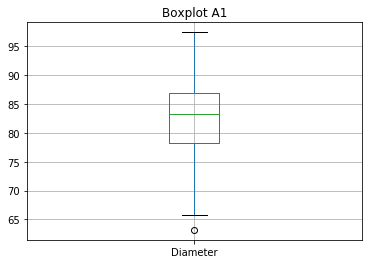

In [68]:
ax = df.loc[:249].boxplot(["Diameter"])
ax.set_title("Boxplot A1")
plt.show()

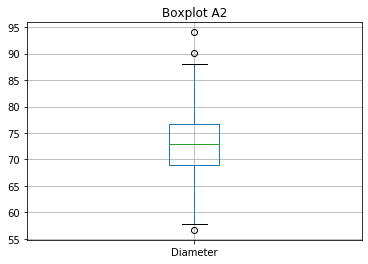

In [69]:
ax = df.loc[250:].boxplot(["Diameter"])
ax.set_title("Boxplot A2")
plt.show()

Pertama ditentukan terlebih dahulu hipotesis nol $H_0$ sebagai berikut:

$H_0$: $\sigma^2_{A_1} = \sigma^2_{A_2}$

Hipotesis nol yang ditetapkan adalah variansi kolom Diameter bagian awal sama dengan variansi kolom Diameter bagian akhir.

Selanjutnya ditentukan hipotesis alternatif $H_1$ sebagai berikut:

$H_1$: $\sigma^2_{A_1} \neq \sigma^2_{A_2}$

Hipotesis alternatif yang ditetapkan adalah variansi kolom Diameter bagian awal tidak sama dengan variansi kolom Diameter bagian akhir. Hal ini berarti variansi $A_1$ dapat lebih besar atau lebih kecil dari variansi $A_2$.

Tingkat signifikansi $\alpha$ ditetapkan dengan:

$\alpha = 0.05$

Tes statistik dilakukan dengan **F-distribution** atau disebut juga *Analysis of variance* (ANOVA). Daerah kritisnya diberikan sebagai berikut:
$$ f < f_{1-\alpha/2}(v_1, v_2) \quad or \quad f > f_{\alpha/2}(v_1, v_2)$$ 
$v_1 = $ derajat kebebasan $A_1 = n_{A_1} - 1$ 

$v_2 = $ derajat kebebasan $A_2 = n_{A_2} - 1$

Hitung $v_1$ dan $v_2$

$n_{A_1} = 250$, $n_{A_2} = 250$

$v_1 = v_2 = 250 - 1 = 249$

Cari batasan daerah kritis dengan bantuan modul ```scipy.stats```:

In [70]:
from scipy.stats import f

upper_bound = f.ppf(1-0.025, 249, 249) # f.ppf(1-alpha/2, v1, v2)
lower_bound = f.ppf(0.025, 249, 249) # f.ppf(alpha/2, v1, v2)
print("Batas atas =", round(upper_bound, 4))
print("Batas bawah =", round(lower_bound, 4))

Batas atas = 1.2827
Batas bawah = 0.7796


Didapatkan daerah kritisnya adalah $ f < 0.7796 \quad or \quad f > 1.2827$

Nilai $f$ harus berada di luar daerah kritis supaya $H_0$ diterima. Rumus $f$ diberikan sebagai berikut:
$$ f = \frac{S_2^2}{S_1^2}$$
$S_1^2$ : variansi sampel $A_1$

$S_2^2$ : variansi sampel $A_2$

Lakukan komputasi untuk mencari nilai $S_1^2$, $S_2^2$, dan $f$

In [71]:
var_1 = df["Diameter"].loc[:249].var()
var_2 = df["Diameter"].loc[250:].var()
f_val = var_1 / var_2
print("Variansi A1 =", round(var_1, 4))
print("Variansi A2 =", round(var_2, 4))
print("Nilai f =", round(f_val, 4))

Variansi A1 = 43.169
Variansi A2 = 39.8283
Nilai f = 1.0839


Didapat nilai f sebesar $1.0839$. Nilai $f$ berada di luar daerah kritis sehingga **\$H_0$ diterima**. Oleh karena itu, dapat diambil kesimpulan **variansi kolom Diameter bagian awal sama dengan variansi kolom Diameter bagian akhir**.

# Nomor 6

Test korelasi: tentukan apakah setiap kolom non-target berkorelasi dengan kolom target,
dengan menggambarkan juga scatter plot nya. Gunakan correlation test.

Formula yang kami gunakan dalam menghitung koefisien korelasi ialah formula Pearson, yakni dalam menghitung koefisien korelasi dua kolom yang dimisalkan dalam array x dan y ialah:
$$ r = \frac{\sigma_{xy}}{\sigma_x \sigma_y} = \frac{n\sum xy - (\sum x)(\sum y)}{\sqrt{(n\sum x^2 - (\sum x)^2)(n\sum y^2 - (\sum y)^2)}}$$ 
Sedangkan tes signifikansi yang kami gunakan ialah karena n sudah bernilai cukup besar yakni 500, data dalam kolom dapat diasumsikan sebagai populasi sehingga dapat kami klasifikasikan sebuah koefisien korelasi sebagai tidak signifikan bila berada dalam range (-0.5, 0.5), dan signifikan bila tidak berada dalam range tersebut.

### id

Cor: 0.8660202075956419


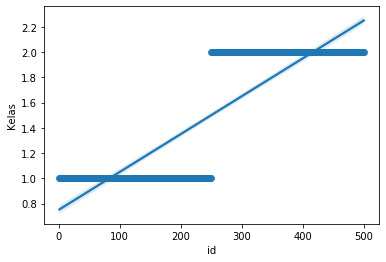

In [74]:
sns.regplot(df[df.columns[0]], df["Kelas"])
print("Cor: " + str(df[df.columns[0]].corr(df['Kelas'])))

Korelasi bernilai positif menandakan kedua kolom berbanding lurus, divisualisasikan dengan gradien positif dari hasil regresi scatter plotnya. Korelasi tidak berada dalam range (-0.5, 0.5) menandakan kedua kolom memiliki ketergantungan yang tidak lemah, divisualisasikan dengan ketidakpastian garis regresi (daerah biru muda di sekitarnya) kecil.

### Daerah

Cor: -0.6027466517416654


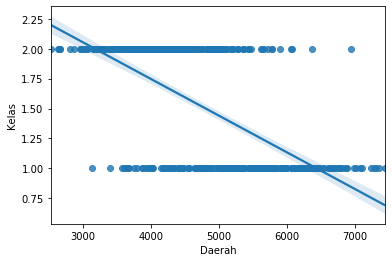

In [75]:
sns.regplot(df[df.columns[1]], df["Kelas"])
print("Cor: " + str(df[df.columns[1]].corr(df['Kelas'])))

Korelasi bernilai negatif menandakan kedua kolom berbanding terbalik, divisualisasikan dengan gradien negatif dari hasil regresi scatter plotnya. Korelasi tidak berada dalam range (-0.5, 0.5) menandakan kedua kolom memiliki ketergantungan yang tidak lemah, divisualisasikan dengan ketidakpastian garis regresi (daerah biru muda di sekitarnya) kecil.

### SumbuUtama

Cor: -0.7130906104204592


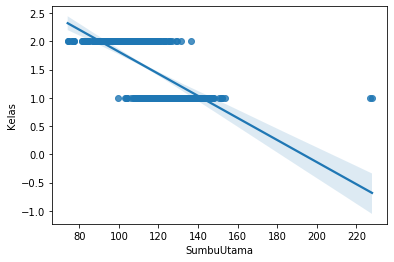

In [76]:
sns.regplot(df[df.columns[2]], df["Kelas"])
print("Cor: " + str(df[df.columns[2]].corr(df['Kelas'])))

Korelasi bernilai negatif menandakan kedua kolom berbanding terbalik, divisualisasikan dengan gradien negatif dari hasil regresi scatter plotnya. Korelasi tidak berada dalam range (-0.5, 0.5) menandakan kedua kolom memiliki ketergantungan yang tidak lemah, divisualisasikan dengan ketidakpastian garis regresi (daerah biru muda di sekitarnya) kecil.

### SumbuKecil

Cor: -0.15297517335535024


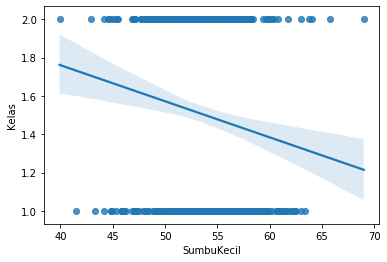

In [77]:
sns.regplot(df[df.columns[3]], df["Kelas"])
print("Cor: " + str(df[df.columns[3]].corr(df['Kelas'])))

Korelasi bernilai negatif menandakan kedua kolom berbanding terbalik, divisualisasikan dengan gradien negatif dari hasil regresi scatter plotnya. 
Korelasi berada dalam range (-0.5, 0.5) menandakan kedua kolom memiliki ketergantungan yang lemah, divisualisasikan dengan ketidakpastian garis regresi (daerah biru muda di sekitarnya) besar.

### Keunikan

Cor: -0.7304563686511927


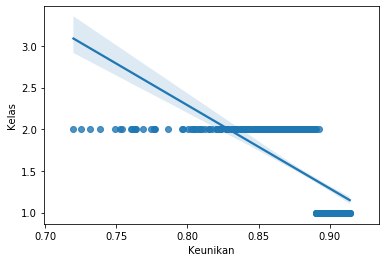

In [78]:
sns.regplot(df[df.columns[4]], df["Kelas"])
print("Cor: " + str(df[df.columns[4]].corr(df['Kelas'])))

Korelasi bernilai negatif menandakan kedua kolom berbanding terbalik, divisualisasikan dengan gradien negatif dari hasil regresi scatter plotnya. Korelasi tidak berada dalam range (-0.5, 0.5) menandakan kedua kolom memiliki ketergantungan yang tidak lemah, divisualisasikan dengan ketidakpastian garis regresi (daerah biru muda di sekitarnya) kecil.

### AreaBulatan

Cor: -0.6073125434153747


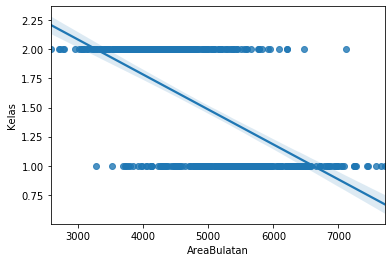

In [79]:
sns.regplot(df[df.columns[5]], df["Kelas"])
print("Cor: " + str(df[df.columns[5]].corr(df['Kelas'])))

Korelasi bernilai negatif menandakan kedua kolom berbanding terbalik, divisualisasikan dengan gradien negatif dari hasil regresi scatter plotnya. Korelasi tidak berada dalam range (-0.5, 0.5) menandakan kedua kolom memiliki ketergantungan yang tidak lemah, divisualisasikan dengan ketidakpastian garis regresi (daerah biru muda di sekitarnya) kecil.

### Diameter

Cor: -0.6025356896618811


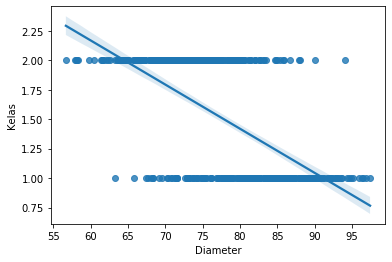

In [80]:
sns.regplot(df[df.columns[6]], df["Kelas"])
print("Cor: " + str(df[df.columns[6]].corr(df['Kelas'])))

Korelasi bernilai negatif menandakan kedua kolom berbanding terbalik, divisualisasikan dengan gradien negatif dari hasil regresi scatter plotnya. Korelasi tidak berada dalam range (-0.5, 0.5) menandakan kedua kolom memiliki ketergantungan yang tidak lemah, divisualisasikan dengan ketidakpastian garis regresi (daerah biru muda di sekitarnya) kecil.

### KadarAir

Cor: 0.13434422605727642


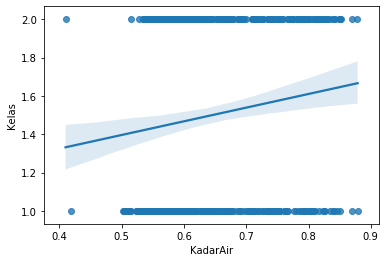

In [82]:
sns.regplot(df[df.columns[7]], df["Kelas"])
print("Cor: " + str(df[df.columns[7]].corr(df['Kelas'])))

Korelasi bernilai positif menandakan kedua kolom berbanding lurus, divisualisasikan dengan gradien positif dari hasil regresi scatter plotnya. 
Korelasi berada dalam range (-0.5, 0.5) menandakan kedua kolom memiliki ketergantungan yang lemah, divisualisasikan dengan ketidakpastian garis regresi (daerah biru muda di sekitarnya) besar.

### Keliling

Cor: -0.6348607454756853


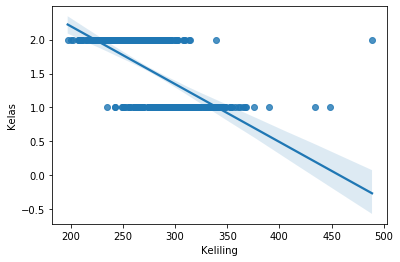

In [83]:
sns.regplot(df[df.columns[8]], df["Kelas"])
print("Cor: " + str(df[df.columns[8]].corr(df['Kelas'])))

Korelasi bernilai negatif menandakan kedua kolom berbanding terbalik, divisualisasikan dengan gradien negatif dari hasil regresi scatter plotnya. 
Korelasi tidak berada dalam range (-0.5, 0.5) menandakan kedua kolom memiliki ketergantungan yang tidak lemah, divisualisasikan dengan ketidakpastian garis regresi (daerah biru muda di sekitarnya) kecil.

### Bulatan

Cor: 0.5450045317240073


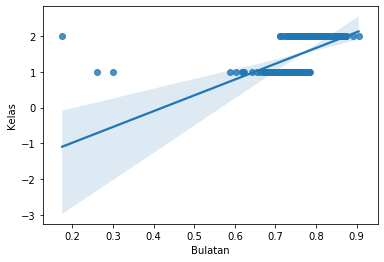

In [84]:
sns.regplot(df[df.columns[9]], df["Kelas"])
print("Cor: " + str(df[df.columns[9]].corr(df['Kelas'])))

Korelasi bernilai positif menandakan kedua kolom berbanding lurus, divisualisasikan dengan gradien positif dari hasil regresi scatter plotnya.
Korelasi tidak berada dalam range (-0.5, 0.5) menandakan kedua kolom memiliki ketergantungan yang tidak lemah, divisualisasikan dengan ketidakpastian garis regresi (daerah biru muda di sekitarnya) kecil.

### Ransum

Cor: -0.8399038681287486


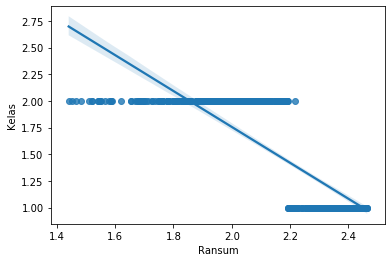

In [85]:
sns.regplot(df[df.columns[10]], df["Kelas"])
print("Cor: " + str(df[df.columns[10]].corr(df['Kelas'])))

Korelasi bernilai negatif menandakan kedua kolom berbanding terbalik, divisualisasikan dengan gradien negatif dari hasil regresi scatter plotnya.
Korelasi tidak berada dalam range (-0.5, 0.5) menandakan kedua kolom memiliki ketergantungan yang tidak lemah, divisualisasikan dengan ketidakpastian garis regresi (daerah biru muda di sekitarnya) kecil.

# Referensi

* Pandas - https://pandas.pydata.org/
* Matplotlib - https://matplotlib.org/
* seaborn - https://seaborn.pydata.org/
* SciPy - https://www.scipy.org/
* Ye, K., Myers, S., Myers, R. and Walpole, R., 2012. Probability & statistics for engineers & scientists. 9th ed. Boston: Pearson Education.